# HW 1 - FCB 4.7

## 4.7 Mixture models: After a posterior analysis on data from a population of squash plants, it was determined that the total vegetable weight of a given plant could be modeled with the following distribution: 
- p(y|theta, sigma^2) = .31dnorm(theta, sigma) + .46dnorm(2theta, 2sigma) + .23dnorm(3theta, 3sigma) 
## Posterior
- 1/sigma^2 ~ gamma(10, 2.5)
- theta|sigma^2 ~ normal(4.1, sigma^2/20).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, gamma, gaussian_kde
import matplotlib.pyplot as plt
from random import random, seed

## a) Sample at least 5,000 y values from the posterior predictive distribution.

In [2]:
np.random.seed(1)
# sigma^2 sampling

sigma_mc=gamma.rvs(a=10, scale=1/2.5, size=5000)
# 1/sigma^2 ~ gamma(10, 2.5)

sigma_mc

array([6.25900612, 3.15466401, 3.24629889, ..., 1.72462613, 3.1825875 ,
       4.29685467])

In [3]:
np.random.seed(1)
# theta sampling
theta_mc = []
for i in range(len(sigma_mc)):
    theta_mc=np.append(theta_mc,norm.rvs(loc=4.1, scale = np.sqrt((sigma_mc[i])/20), size=1))
                    # theta|sigma^2 ~ normal(4.1, sigma^2/20).
    
theta_mc

array([5.00869066, 3.85703703, 3.88720843, ..., 3.87212989, 4.5327732 ,
       5.13918747])

In [4]:
np.random.seed(1)
# y sampling from the posterior predictive distribution
y_mc = []
for i in range(len(sigma_mc)):
    y_mc=np.append(y_mc,
                   0.31 * norm.rvs(loc = theta_mc[i], scale = np.sqrt(sigma_mc[i]), size = 1) + 
                   0.46 * norm.rvs(loc = 2 * theta_mc[i], scale = 2 * np.sqrt(sigma_mc[i]), size = 1) +
                   0.23 * norm.rvs(loc = 3 * theta_mc[i], scale = 3 * np.sqrt(sigma_mc[i]), size = 1))

y_mc

array([ 8.55665478,  5.40823226,  7.57283926, ..., 10.49025967,
       10.3783174 , 10.78460436])

## b) Form a 75% quantile-based confidence interval for a new value of Y.

In [5]:
CI_75 = (np.quantile(y_mc, 0.125), np.quantile(y_mc, 0.875)) # 75% CI (12.5% ~ 87.5%)
CI_75

(5.104506889579647, 10.74434808997568)

## c) Form a 75% HPD(Highest Posterior Density) region for a new Y as follows:

## i. Compute estimates of the posterior density of Y using the density command in R, and then normalize the density values so they sum to 1.


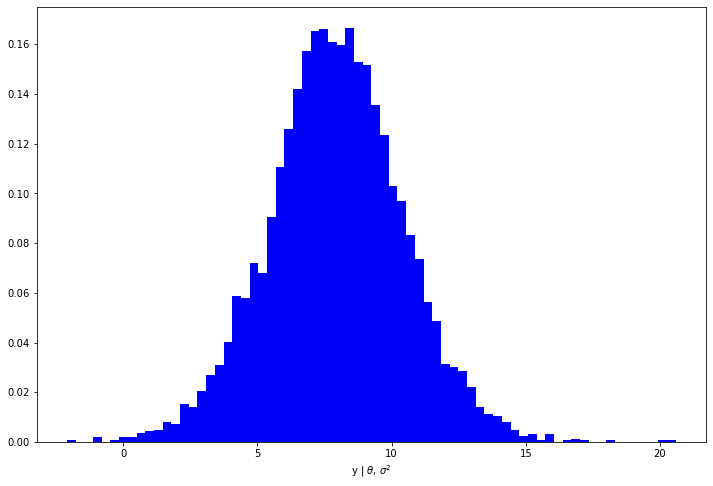

In [6]:
plt.figure(figsize=(12, 8))
plt.hist(y_mc, bins = 70, color='blue', density = True)
plt.xlabel(r'y | $\theta$, $\sigma^2$')
plt.show()

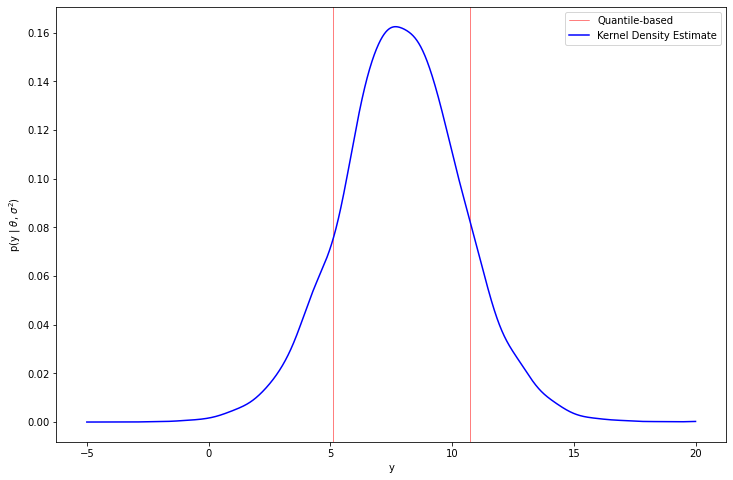

In [7]:
y = np.arange(-5, 20, 0.01)
kde = gaussian_kde(y_mc, bw_method='silverman')
pdf_kde = kde(y)

plt.figure(figsize=(12, 8))
plt.axvline(x=CI_75[0], color='r', linewidth=0.5, label = "Quantile-based")
plt.axvline(x=CI_75[1], color='r', linewidth=0.5)
plt.plot(y, pdf_kde, color='blue', label='Kernel Density Estimate')
plt.xlabel('y')
plt.ylabel(r'p(y | $\theta$, $\sigma^2$)')
plt.legend()
plt.show()

## ii. Sort these discrete probabilities in decreasing order.

In [12]:
pdf_sort = pdf_kde.copy()
pdf_sort.sort()
pdf_sort = pdf_sort[::-1]
pdf_sort

array([1.62475574e-01, 1.62475180e-01, 1.62473795e-01, ...,
       2.90295358e-12, 2.56435970e-12, 2.26428668e-12])

## iii. Find the first probability value such that the cumulative sum of the sorted values exceeds 0.75. Your HPD region includes all values of y which have a discretized probability greater than this cutoff. Describe your HPD region, and compare it to your quantile-based region.


In [13]:
i = 0
while True:
    i += 1
    if 0.01 * pdf_sort[0:i].sum()>= 0.75:    
        break
        
pdf_HPD1 = pdf_sort[i-1]
pdf_HPD2 = pdf_sort[i]

In [14]:
CI_HPD = (np.round(y[np.where(pdf_kde == pdf_HPD1)][0],2), np.round(y[np.where(pdf_kde == pdf_HPD2)][0],2))
CI_HPD

(10.88, 5.16)

In [15]:
CI_HPD=CI_HPD[::-1]
CI_HPD

(5.16, 10.88)

- sampling 한 데이터로 추정한 75% CI는 
(5.104506889579647, 10.74434808997568)

## d) Can you think of a physical justification for the mixture sampling distribution of Y ?

# HW 2

## (a) Find transition prob. matrix = M

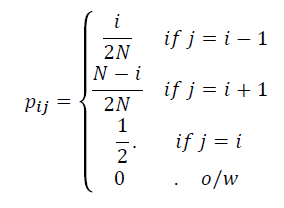

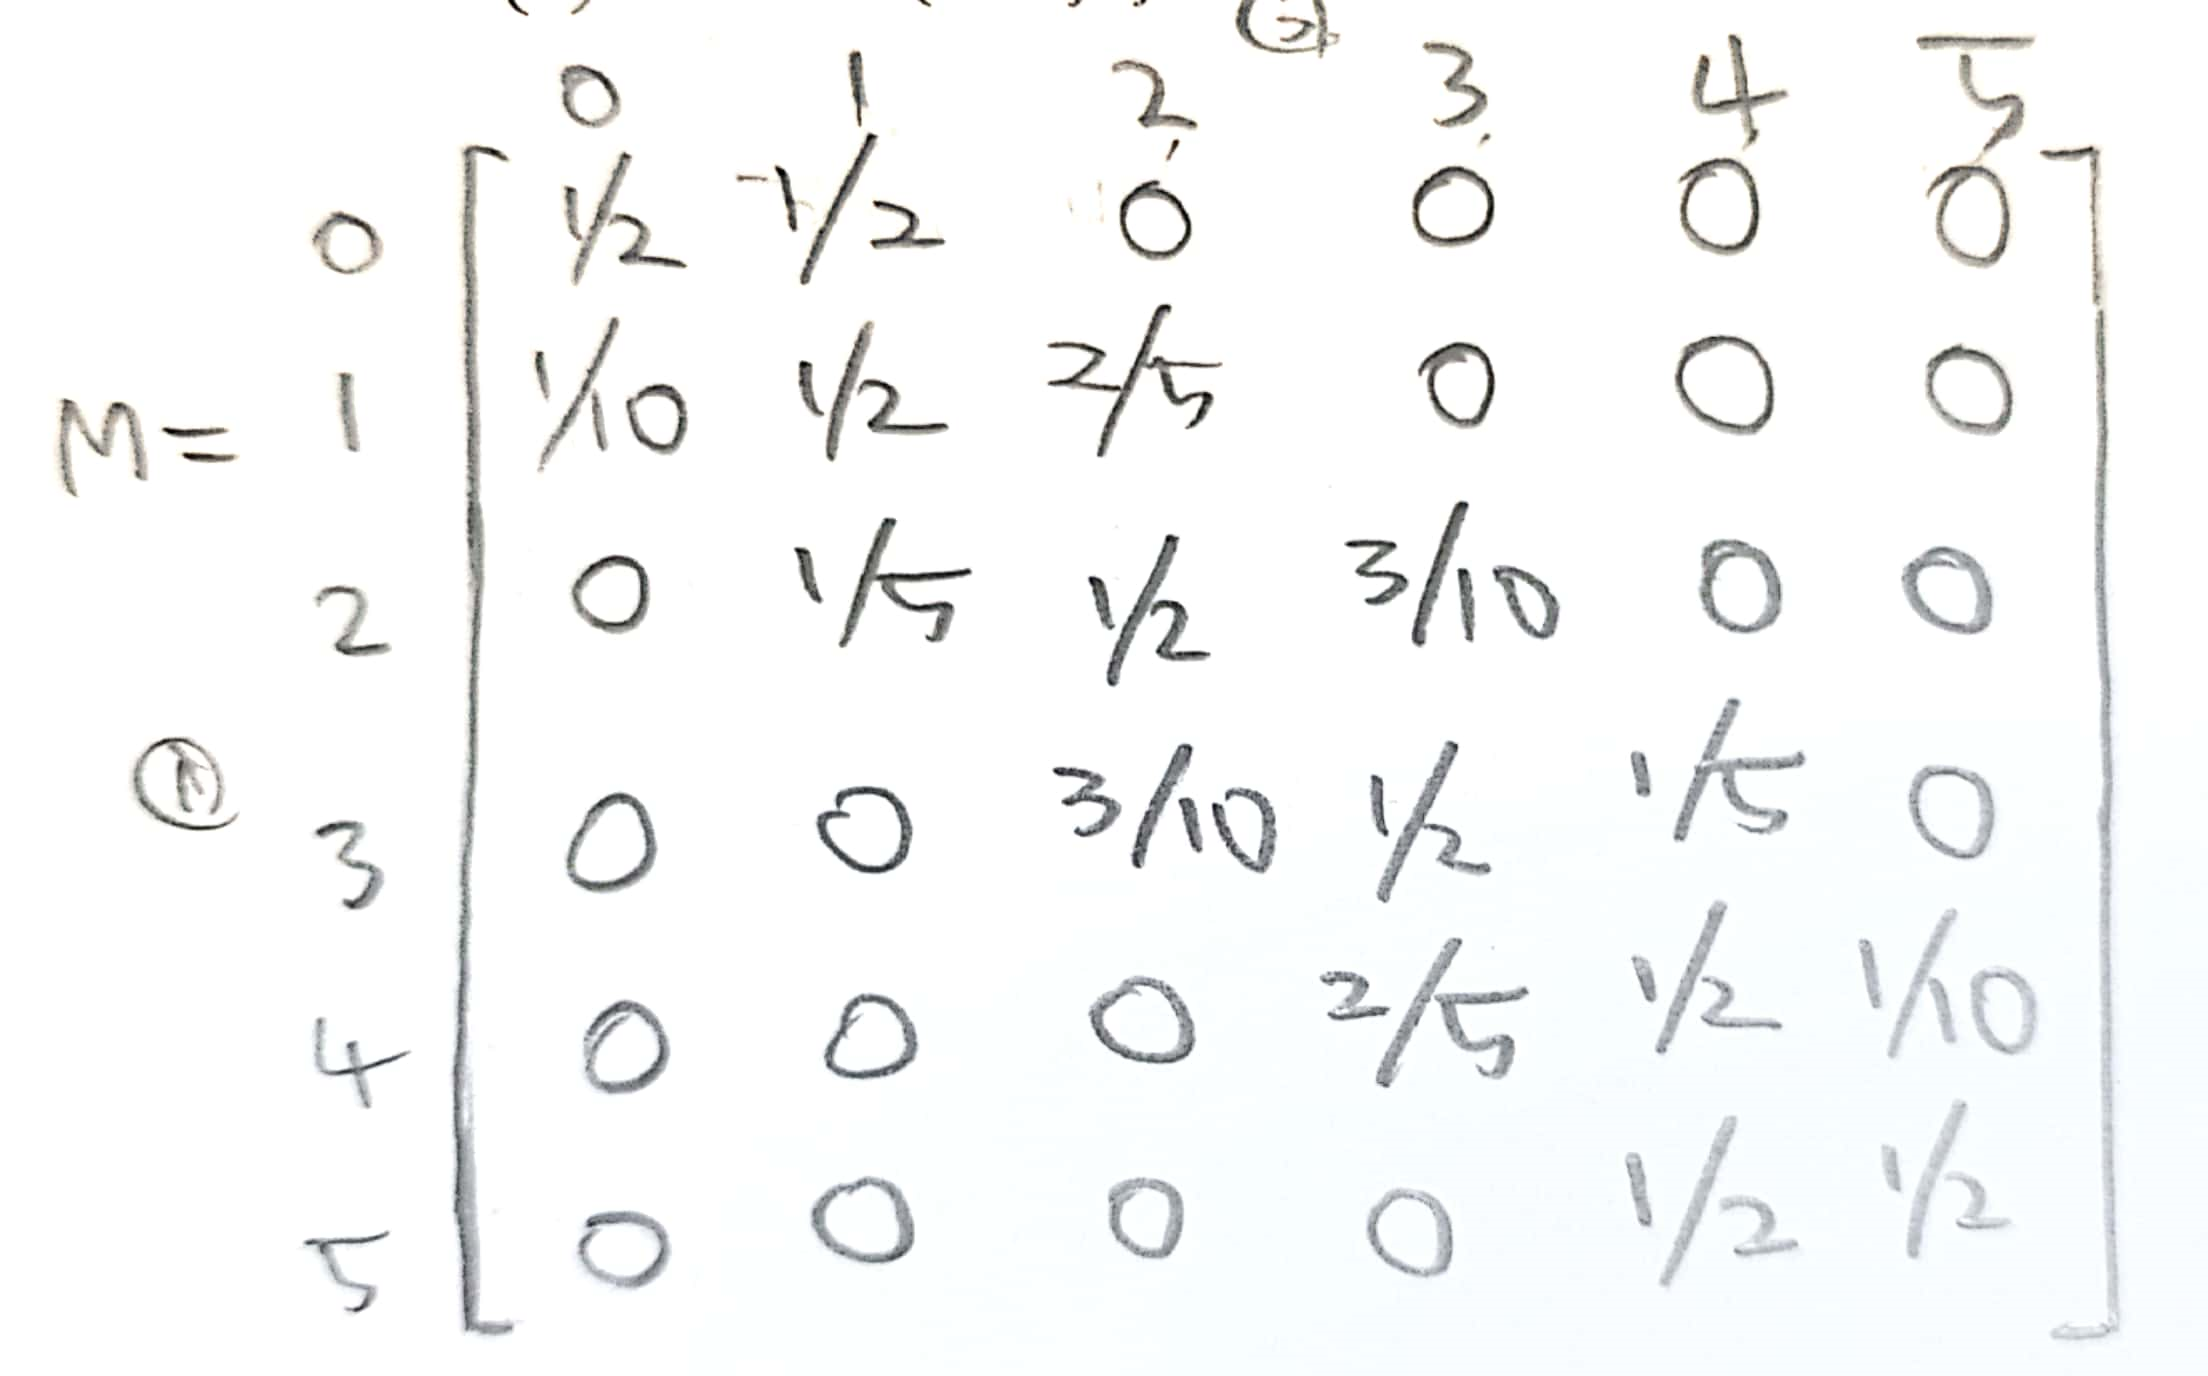

In [16]:
M=np.array([[1/2,1/2,0,0,0,0],
            [1/10,1/2,2/5,0,0,0],
            [0,1/5,1/2,3/10,0,0],
            [0,0,3/10,1/2,1/5,0],
            [0,0,0,2/5,1/2,1/10],
            [0,0,0,0,1/2,1/2]])
print(M)

[[0.5 0.5 0.  0.  0.  0. ]
 [0.1 0.5 0.4 0.  0.  0. ]
 [0.  0.2 0.5 0.3 0.  0. ]
 [0.  0.  0.3 0.5 0.2 0. ]
 [0.  0.  0.  0.4 0.5 0.1]
 [0.  0.  0.  0.  0.5 0.5]]


## (b) Calculate 𝑀^10,𝑀^50,𝑀^100, and check each entry converges somewhere.

In [17]:
def dotproduct(A,n):
    A_n=A
    for i in range(n-1):
        A_n=A_n@A
    return A_n

In [18]:
print('M^10', dotproduct(M,10),sep='\n')
print('M^50', dotproduct(M,50),sep='\n')
print('M^100', dotproduct(M,100),sep='\n')

M^10
[[0.04994957 0.2084384  0.34220979 0.275232   0.10784064 0.0163296 ]
 [0.04168768 0.18683348 0.33188992 0.29159839 0.1264224  0.02156813]
 [0.03422098 0.16594496 0.31997983 0.30653184 0.14579919 0.0275232 ]
 [0.0275232  0.14579919 0.30653184 0.31997983 0.16594496 0.03422098]
 [0.02156813 0.1264224  0.29159839 0.33188992 0.18683348 0.04168768]
 [0.0163296  0.10784064 0.275232   0.34220979 0.2084384  0.04994957]]
M^50
[[0.03125223 0.15625669 0.31250446 0.31249554 0.15624331 0.03124777]
 [0.03125134 0.15625401 0.31250268 0.31249732 0.15624599 0.03124866]
 [0.03125045 0.15625134 0.31250089 0.31249911 0.15624866 0.03124955]
 [0.03124955 0.15624866 0.31249911 0.31250089 0.15625134 0.03125045]
 [0.03124866 0.15624599 0.31249732 0.31250268 0.15625401 0.03125134]
 [0.03124777 0.15624331 0.31249554 0.31250446 0.15625669 0.03125223]]
M^100
[[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 

In [19]:
print('M^80', dotproduct(M,80),sep='\n')
print('M^90', dotproduct(M,90),sep='\n')
print('M^110', dotproduct(M,110),sep='\n')
print('M^1000', dotproduct(M,1000),sep='\n')

M^80
[[0.03125    0.15625001 0.31250001 0.31249999 0.15624999 0.03125   ]
 [0.03125    0.15625    0.3125     0.3125     0.15625    0.03125   ]
 [0.03125    0.15625    0.3125     0.3125     0.15625    0.03125   ]
 [0.03125    0.15625    0.3125     0.3125     0.15625    0.03125   ]
 [0.03125    0.15625    0.3125     0.3125     0.15625    0.03125   ]
 [0.03125    0.15624999 0.31249999 0.31250001 0.15625001 0.03125   ]]
M^90
[[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]]
M^110
[[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.031

## (c) Check ∀x∈S,P(′#𝑜𝑓𝑓𝑙𝑒𝑎𝑠𝑜𝑛𝑀𝑎𝑐𝑎𝑡𝑡=100′=𝑥)is hardly affected by ‘# of fleas on Mac at t=0’ (to say that thatP(′#𝑜𝑓𝑓𝑙𝑒𝑎𝑠𝑜𝑛𝑀𝑎𝑐𝑎𝑡𝑒𝑛𝑜𝑢𝑔ℎ𝑙𝑎𝑟𝑔𝑒𝑡′=𝑥)is not affected by ‘# of fleas on Mac at t=0’ at all).

### M^100에서 i번째 row vector: 
### initial state=i일 때 100steps 후 j로 갈 확률

In [20]:
print('M_0j_100', np.array([1,0,0,0,0,0])@dotproduct(M,100),sep='\n')
print('M_1j_100', np.array([0,1,0,0,0,0])@dotproduct(M,100),sep='\n')
print('M_2j_100', np.array([0,0,1,0,0,0])@dotproduct(M,100),sep='\n')
print('M_3j_100', np.array([0,0,0,1,0,0])@dotproduct(M,100),sep='\n')
print('M_4j_100', np.array([0,0,0,0,1,0])@dotproduct(M,100),sep='\n')
print('M_5j_100', np.array([0,0,0,0,0,1])@dotproduct(M,100),sep='\n')

M_0j_100
[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
M_1j_100
[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
M_2j_100
[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
M_3j_100
[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
M_4j_100
[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
M_5j_100
[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]


## 시각화

[[0.5 0.5 0.  0.  0.  0. ]] 1
[[0.3 0.5 0.2 0.  0.  0. ]] 2
[[0.2  0.44 0.3  0.06 0.   0.  ]] 3
[[0.144 0.38  0.344 0.12  0.012 0.   ]] 4
[[0.11   0.3308 0.36   0.168  0.03   0.0012]] 5
[[0.08808 0.2924  0.36272 0.204   0.0492  0.0036 ]] 6
[[0.07328  0.262784 0.35952  0.230496 0.0672   0.00672 ]] 7
[[0.0629184 0.239936  0.3540224 0.249984  0.0830592 0.01008  ]] 8
[[0.0554528  0.22223168 0.3479808  0.2644224  0.0965664  0.01334592]] 9
[[0.04994957 0.2084384  0.34220979 0.275232   0.10784064 0.0163296 ]] 10
[[0.04581862 0.19763594 0.33704986 0.28341519 0.11713152 0.01894886]] 11
[[0.04267291 0.18913725 0.33260386 0.28967516 0.12472323 0.02118758]] 12
[[0.04025018 0.18242585 0.32885938 0.29450803 0.13089044 0.02306612]] 13
[[0.03836767 0.17710989 0.32575244 0.29826801 0.13587988 0.0246221 ]] 14
[[0.03689483 0.17288927 0.32320058 0.30121169 0.13990459 0.02589904]] 15
[[0.03573634 0.16953216 0.32111951 0.30352786 0.14314415 0.02693998]] 16
[[0.03482139 0.16685815 0.31943098 0.30535744 0.145

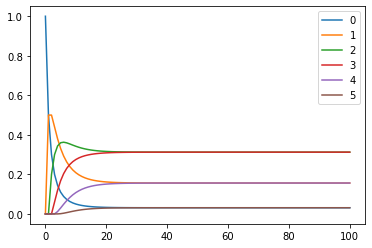

In [22]:
# initial state=0

state=np.array([[1, 0, 0, 0, 0, 0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0,0,0]]
for x in range(100):
  state=np.dot(state,M);
  print(state,(x+1));
  stateHist=np.append(stateHist,state,axis=0);
  dfDistrHist = pd.DataFrame(stateHist);
dfDistrHist.plot()
plt.show()

[[0.  0.2 0.5 0.3 0.  0. ]] 1
[[0.02 0.2  0.42 0.3  0.06 0.  ]] 2
[[0.03  0.194 0.38  0.3   0.09  0.006]] 3
[[0.0344 0.188  0.3576 0.3    0.108  0.012 ]] 4
[[0.036   0.18272 0.344   0.30048 0.12    0.0168 ]] 5
[[0.036272 0.17816  0.335232 0.30144  0.128496 0.0204  ]] 6
[[0.035952  0.1742624 0.329312  0.302688  0.134736  0.0230496]] 7
[[0.03540224 0.1709696  0.32516736 0.304032   0.1394304  0.0249984 ]] 8
[[0.03479808 0.16821939 0.32218112 0.30533837 0.1430208  0.02644224]] 9
[[0.03422098 0.16594496 0.31997983 0.30653184 0.14579919 0.0275232 ]] 10
[[0.03370499 0.16407894 0.31832745 0.30757955 0.14796756 0.02834152]] 11
[[0.03326039 0.16255745 0.31706916 0.30847503 0.14967045 0.02896752]] 12
[[0.03288594 0.16132275 0.31610007 0.30922645 0.15101399 0.0294508 ]] 13
[[0.03257524 0.16032436 0.31534707 0.30984884 0.15207769 0.0298268 ]] 14
[[0.03232006 0.15951922 0.31475793 0.31035962 0.15292201 0.03012117]] 15
[[0.03211195 0.15887122 0.31429454 0.31077599 0.15359351 0.03035279]] 16
[[0.03194

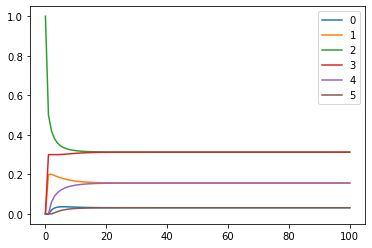

In [23]:
# initial state=2

state=np.array([[0, 0, 1, 0, 0, 0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0,0,0]]
for x in range(100):
  state=np.dot(state,M);
  print(state,(x+1))
  stateHist=np.append(stateHist,state,axis=0);
  dfDistrHist = pd.DataFrame(stateHist);
dfDistrHist.plot()
plt.show()

## (d) (d) Let T=50000, and consider each 𝑊𝑡∈𝑇as a sampling of distribution D. Check how D looks like and compare D with 𝑋~𝐵𝑖𝑛𝑜𝑚𝑖𝑎𝑙(5,½)

{0: 1632, 1: 7964, 2: 15564, 3: 15426, 4: 7901, 5: 1514}


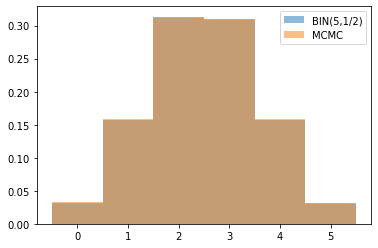

In [24]:
np.random.seed(1)

# sampling from dstribution D
iter=50000

W=0
chainHist=W

for i in range(iter):
    p=list(M[W].flatten())
    W=np.random.choice(6,1,p=p)
    chainHist=np.append(chainHist,W)
    
count={}
for i in chainHist:
    try: count[i] += 1
    except: count[i]=1
print(count)
plt.figure()

# sampling from Bin(5,1/2)
bi=np.random.binomial(5,1/2,50000)
    

plt.hist(bi,bins=np.linspace(-0.5,5.5,7), alpha=0.5, density=True, label='BIN(5,1/2)')
plt.hist(chainHist, bins=np.linspace(-0.5,5.5,7),alpha=0.5, density=True, label='MCMC')
plt.legend()
plt.show()

-> 두 히스토그램이 거의 일치

## (e) Check 𝑃(′#𝑜𝑓𝑓𝑙𝑒𝑎𝑠𝑜𝑛𝑀𝑎𝑐𝑎𝑡𝑡=100′=𝑥)≅𝑃_𝐷(𝑥)≅𝑃_𝐵𝑖𝑛𝑜𝑚𝑖𝑎𝑙(5,1/2)(𝑥)

In [28]:
print(stateHist[100])
distpD=[count.get(0)*1/50000, count.get(1)*1/50000, count.get(2)*1/50000, count.get(3)*1/50000, count.get(4)*1/50000, count.get(5)*1/50000]
print(distpD)
print([0.03125, 0.15625, 0.3125,  0.3125,  0.15625, 0.03125])
#(5C0(1/2)^5, 5C1(1/2)^5, 5C2(1/2)^5, 5C3(1/2)^5, 5C4(1/2)^5, 5C5(1/2)^5)

[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
[0.03264, 0.15928, 0.31128, 0.30852, 0.15802, 0.03028]
[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]
